In [3]:
%matplotlib inline

import corpusToDict as ctd
from nltk.tokenize import word_tokenize
from nltk import ngrams, FreqDist
import matplotlib.pyplot as plt

read the dataset here:

In [4]:
# path to the corpus:
filePath = "./Corpus.csv"

corpus = ctd.getCorpus(filePath)

In [5]:
# find the vocabulary of the corpus, and a large combined string of all the text:
vocabulary = set()
data = ""

for i in range(1, len(corpus)):
    text = corpus[i][0]
    data += text
    tokens = word_tokenize(text)
    
    vocabulary.update(tokens)
    

Perform some basic analysis on the vocablualry now


In [13]:
print(vocabulary)


{'tremble', 'confusion', 'explained', 'Gunpowder', '4.4', 'rename', 'upto', 'ballroom', 'OSI', 'A-Levels', 'bodyguard', 'an', 'unexpectedly', 'piece', "'useless", 'Reducing', 'sergeant', 'reporting', 'deployed', 'founded', 'cel', 'Hollywood', 'Kings', 'Rural', 'inventive', 'Cicero', 'Godman', 'Â£400', 'shoulders', 'Atomic', 'entertainers', 'volleyed', 'parliamentary', 'non-story', 'sails', 'Funding', 'marshals', 'Bombay-based', 'not-so-secret', 'hospitality', 'inevitably', 'IDN-disabled', 'purchased', 'Newsome', "'more", 'subject', 'Steps', 'battled', 'Group', '45.25', 'Godzilla', 'antiseptics', 'tech-production', 'Inadvertently', 'pleas', 'well-known', 'miss', 'More', 'aftermath', 'rings', 'Siniscalco', 'Â£420m', 'performances', '35.8bn', 'Grandchild', 'Caledonian', 'duty', 'founders', 'cowboys', 'back', 'habeus', 'metal', "'EU", '1.1bn', 'Faces', '1955', 'Tessa', 'Stiller', 'Huffman', 'leukoencephalopathy', 'intent', 'Charcote', 'blindingly', 'Quillinan-Meiland', 'humanity', 'produce

In [6]:
print(len(vocabulary))

38787


### Plot and print the 5 most frequent N-gram sequences of len 2, 3, 4, 5

In [7]:
allCounts = {}

for size in range(2, 6):
    allCounts[size] = FreqDist(ngrams(data, size))
    

PLotting for ngrmas of desired size 

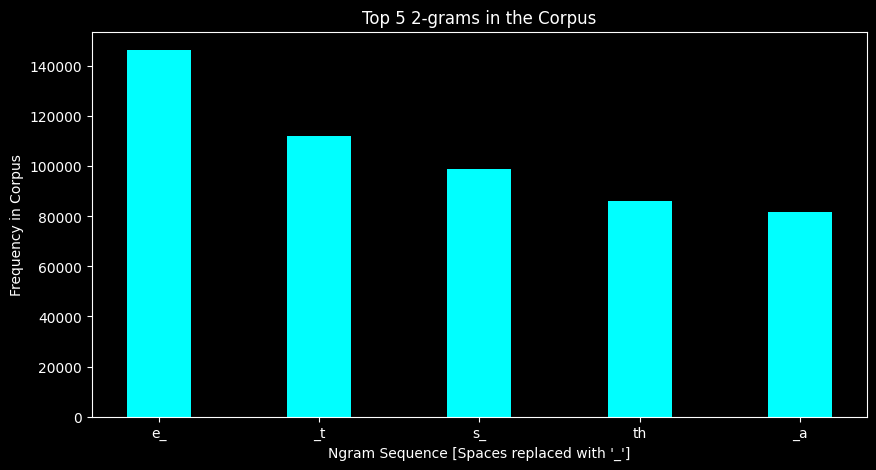

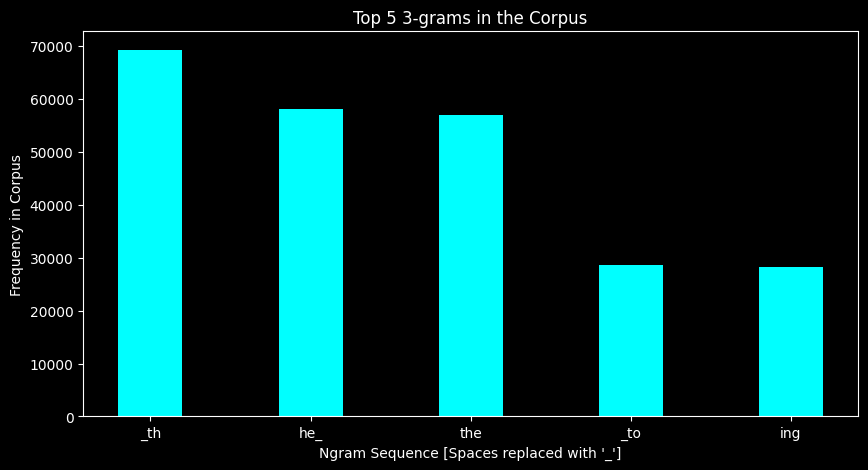

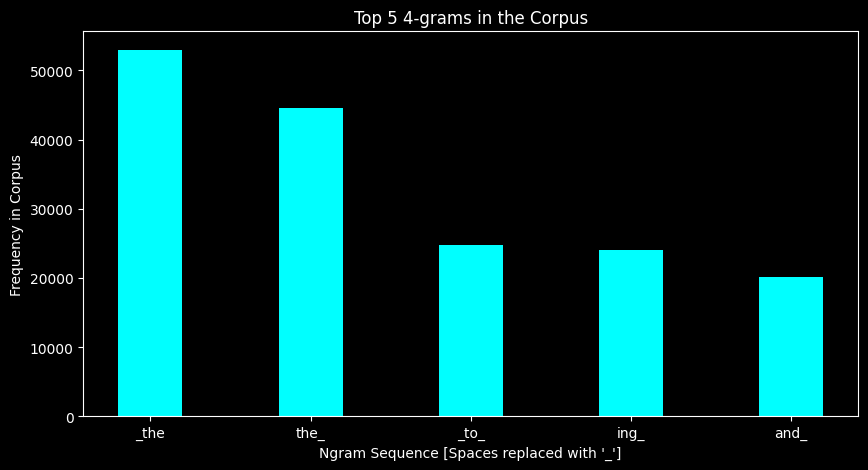

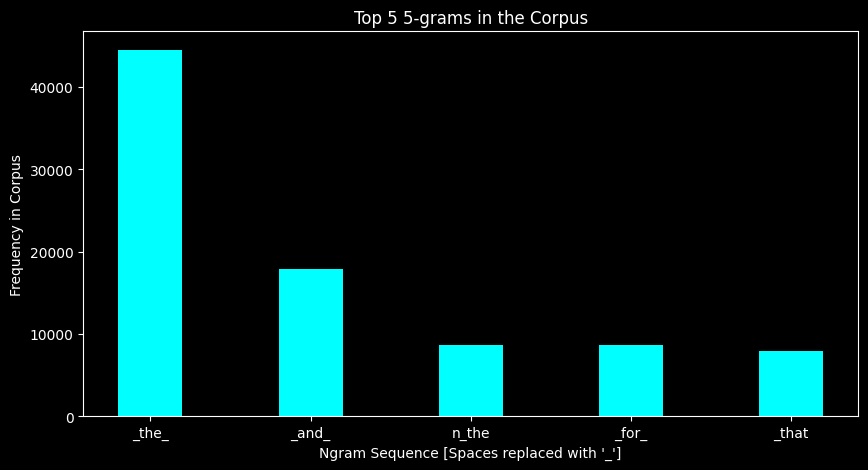

In [28]:
for size in [2, 3, 4, 5]:
    grams = allCounts[size].most_common(5)
    sequences = []
    values = []

    # getting the n-gram values and their respective frequencies in their respective lists to plot them:
    for pairs in grams:
        
        string = ""
        for chars in pairs[0]:
            if chars == " ":
                string+= "_"
            else:
                string += chars
        sequences.append(string)
        
        values.append(pairs[1])

    fig = plt.figure(figsize=(10, 5))
    
    # everyone will thank me for this
    plt.style.use('dark_background')
    
    # creating a bar plot
    plt.bar(sequences, values, color="aqua", width=0.4)
    


    plt.xlabel("Ngram Sequence [Spaces replaced with '_']")
    plt.ylabel("Frequency in Corpus")
    plt.title(f"Top 5 {size}-grams in the Corpus")

    plt.show()